<a href="https://colab.research.google.com/github/Renato-diasf/My_first_data_analysis_notebook/blob/main/An%C3%A1lise_Descritiva.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***
# <font color=green size=10>CURSO DE ESTATÍSTICA - PARTE 1</font>
***

## Trabalho de Análise Descritiva de um Conjunto de Dados

Utilizando os conhecimentos adquiridos em nosso treinamento realize uma análise descritiva básica de um conjunto de dados retirados da Pesquisa Nacional por Amostra de Domicílios - 2015 do IBGE.

Vamos construir histogramas, calcular e avaliar medidas de tendência central, medidas separatrizes e de dispersão dos dados.

Siga o roteiro proposto e vá completando as células vazias. Procure pensar em mais informações interessantes que podem ser exploradas em nosso dataset.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# <font color=green>DATASET DO PROJETO</font>
***

### Pesquisa Nacional por Amostra de Domicílios - 2015

A <b>Pesquisa Nacional por Amostra de Domicílios - PNAD</b> investiga anualmente, de forma permanente, características gerais da população, de educação, trabalho, rendimento e habitação e outras, com periodicidade variável, de acordo com as necessidades de informação para o país, como as características sobre migração, fecundidade, nupcialidade, saúde, segurança alimentar, entre outros temas. O levantamento dessas estatísticas constitui, ao longo dos 49 anos de realização da pesquisa, um importante instrumento para formulação, validação e avaliação de políticas orientadas para o desenvolvimento socioeconômico e a melhoria das condições de vida no Brasil.

### Fonte dos Dados

https://ww2.ibge.gov.br/home/estatistica/populacao/trabalhoerendimento/pnad2015/microdados.shtm

### Variáveis utilizadas

> ### Renda
> ***

Rendimento mensal do trabalho principal para pessoas de 10 anos ou mais de idade.

> ### Idade
> ***

Idade do morador na data de referência em anos.

> ### Altura (elaboração própria)
> ***

Altura do morador em metros.

> ### UF
> ***

|Código|Descrição|
|---|---|
|11|Rondônia|
|12|Acre|
|13|Amazonas|
|14|Roraima|
|15|Pará|
|16|Amapá|
|17|Tocantins|
|21|Maranhão|
|22|Piauí|
|23|Ceará|
|24|Rio Grande do Norte|
|25|Paraíba|
|26|Pernambuco|
|27|Alagoas|
|28|Sergipe|
|29|Bahia|
|31|Minas Gerais|
|32|Espírito Santo|
|33|Rio de Janeiro|
|35|São Paulo|
|41|Paraná|
|42|Santa Catarina|
|43|Rio Grande do Sul|
|50|Mato Grosso do Sul|
|51|Mato Grosso|
|52|Goiás|
|53|Distrito Federal|

> ### Sexo
> ***

|Código|Descrição|
|---|---|
|0|Masculino|
|1|Feminino|

> ### Anos de Estudo
> ***

|Código|Descrição|
|---|---|
|1|Sem instrução e menos de 1 ano|
|2|1 ano|
|3|2 anos|
|4|3 anos|
|5|4 anos|
|6|5 anos|
|7|6 anos|
|8|7 anos|
|9|8 anos|
|10|9 anos|
|11|10 anos|
|12|11 anos|
|13|12 anos|
|14|13 anos|
|15|14 anos|
|16|15 anos ou mais|
|17|Não determinados|
||Não aplicável|

> ### Cor
> ***

|Código|Descrição|
|---|---|
|0|Indígena|
|2|Branca|
|4|Preta|
|6|Amarela|
|8|Parda|
|9|Sem declaração|

#### <font color='red'>Observação</font>
***
> Os seguintes tratamentos foram realizados nos dados originais:
> 1. Foram eliminados os registros onde a <b>Renda</b> era inválida (999 999 999 999);
> 2. Foram eliminados os registros onde a <b>Renda</b> era missing;
> 3. Foram considerados somente os registros das <b>Pessoas de Referência</b> de cada domicílio (responsável pelo domicílio).

***
***

### Utilize a célula abaixo para importar as biblioteca que precisar para executar as tarefas
#### <font color='red'>Sugestões: pandas, numpy, seaborn</font>

In [3]:
import pandas as pd
import seaborn as sb
import numpy as np

### Importe o dataset e armazene o conteúdo em uma DataFrame

In [4]:
dados = pd.read_csv("/content/drive/MyDrive/dados.csv")



### Visualize o conteúdo do DataFrame

In [5]:
dados

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631
...,...,...,...,...,...,...,...
76835,53,1,46,2,11,812,1.687030
76836,53,0,30,4,7,1500,1.792934
76837,53,0,32,8,12,1300,1.830587
76838,53,0,57,8,4,1500,1.726344


### Para avaliarmos o comportamento da variável RENDA vamos construir uma tabela de frequências considerando as seguintes classes em salários mínimos (SM)
#### <font color='blue'>Descreva os pontos mais relevantes que você observa na tabela e no gráfico.</font>

Classes de renda:

<b>A</b> ► Acima de 25 SM

<b>B</b> ► De 15 a 25 SM

<b>C</b> ► De 5 a 15 SM

<b>D</b> ► De 2 a 5 SM

<b>E</b> ► Até 2 SM

Para construir as classes de renda considere que o salário mínimo na época da pesquisa era de <b>R$ 788,00</b>.

#### Siga os passos abaixo:

### 1º Definir os intevalos das classes em reais (R$)

In [6]:
dados.Renda.max()

200000

In [7]:
dados.Renda.min()

0

In [8]:
classes = [0, 1576, 3152, 7880, 15760, 200000]

### 2º Definir os labels das classes

In [9]:
labels = ["E", "D", "C", "B", "A"]

### 3º Construir a coluna de frequências

In [10]:
frequencia = pd.cut(x = dados.Renda,
                    bins = classes,
                    labels = labels,
                    include_lowest = True)
frequencia = pd.Series(frequencia).value_counts()
frequencia

E    49755
D    16700
C     7599
B     2178
A      608
Name: Renda, dtype: int64

### 4º Construir a coluna de percentuais

In [11]:
percentual = pd.Series(
                      pd.cut(
                             x = dados.Renda,
                             bins = classes,
                             labels = labels,
                             include_lowest = True
                      )
).value_counts(normalize = True) * 100
percentual

E    64.751432
D    21.733472
C     9.889381
B     2.834461
A     0.791255
Name: Renda, dtype: float64

### 5º Juntar as colunas de frequência e percentuais e ordenar as linhas de acordo com os labels das classes

In [12]:
dist_freq = pd.DataFrame({"Frequência": frequencia, "Percentual (%)": percentual})
dist_freq.sort_index(ascending = False, inplace = True)
dist_freq.rename_axis("Classes", axis = "columns", inplace = True)
dist_freq

Classes,Frequência,Percentual (%)
A,608,0.791255
B,2178,2.834461
C,7599,9.889381
D,16700,21.733472
E,49755,64.751432



### Construa um gráfico de barras para visualizar as informações da tabela de frequências acima

Text(0, 0.5, 'Percentual (%)')

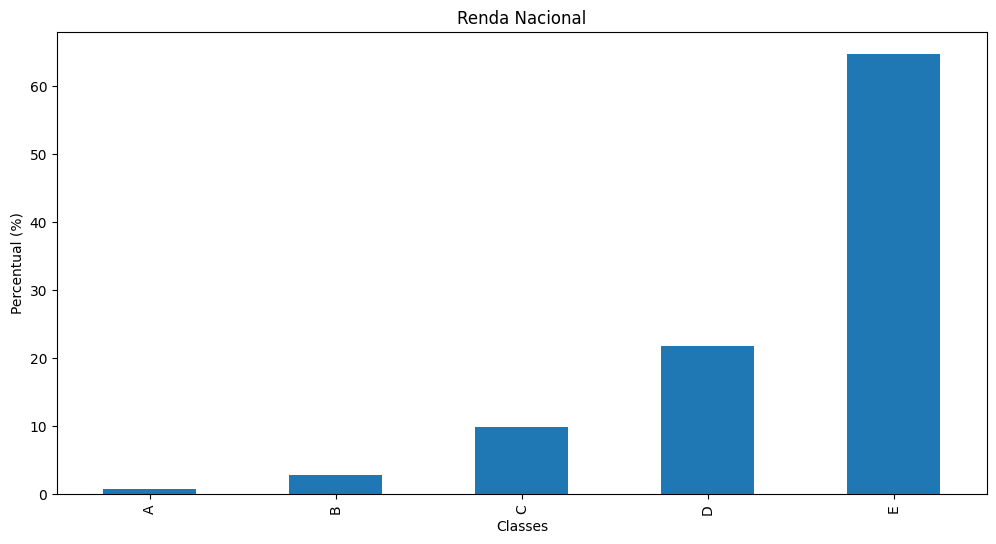

In [13]:
ax = dist_freq["Percentual (%)"].plot.bar()
ax.figure.set_size_inches(12, 6)
ax.set_title("Renda Nacional")
ax.set_xlabel("Classes")
ax.set_ylabel("Percentual (%)")

> ### Conclusões

Escreva suas conclusões aqui...

### Crie um histograma para as variáveis QUANTITATIVAS de nosso dataset
#### <font color='blue'>Descreva os pontos mais relevantes que você observa nos gráficos (assimetrias e seus tipos, possíveis causas para determinados comportamentos etc.)</font>

Text(0, 0.5, 'Frequência')

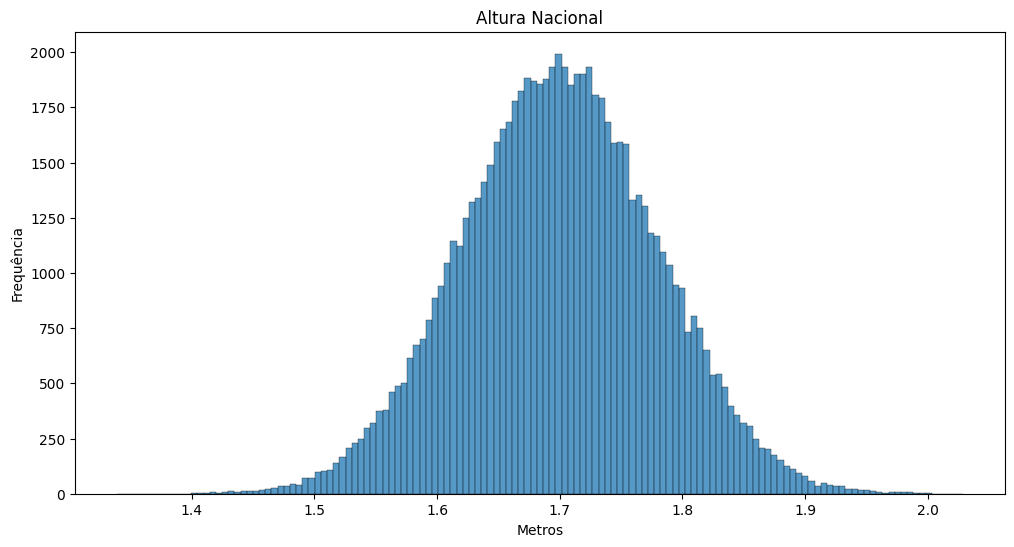

In [14]:
ax = sb.histplot(data = dados.Altura)
ax.figure.set_size_inches(12, 6)
ax.set_title("Altura Nacional")
ax.set_xlabel("Metros")
ax.set_ylabel("Frequência")

<Axes: xlabel='Renda', ylabel='Count'>

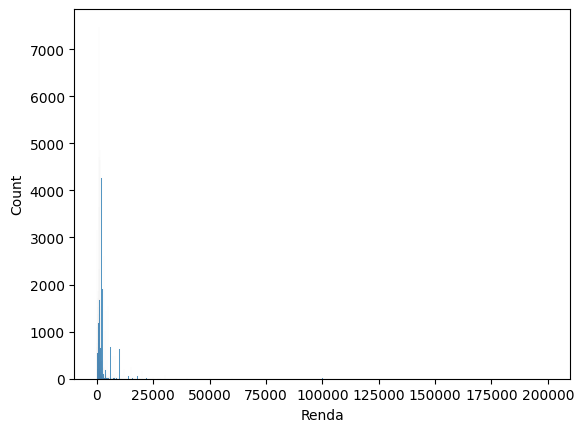

In [15]:
sb.histplot(dados.Renda)

<Axes: xlabel='Anos de Estudo', ylabel='Count'>

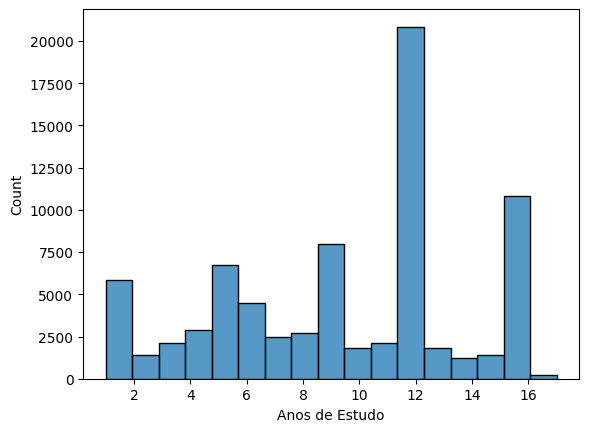

In [16]:
sb.histplot(data = dados["Anos de Estudo"], bins = 17)

<Axes: xlabel='Idade', ylabel='Count'>

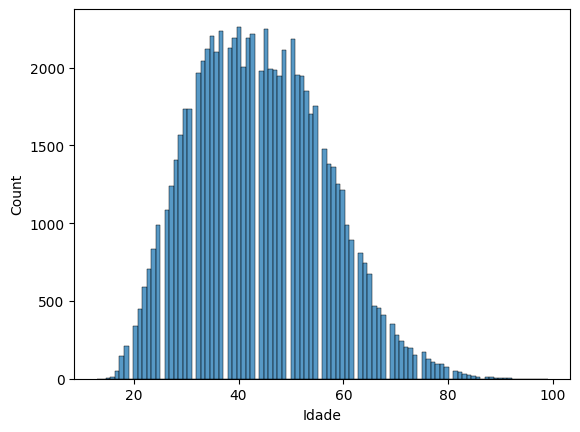

In [17]:
sb.histplot(data = dados.Idade, bins = 100)

> ### Conclusões

Escreva suas conclusões aqui...

### Para a variável RENDA, construa um histograma somente com as informações das pessoas com rendimento até R$ 20.000,00

Text(0, 0.5, 'Frequência')

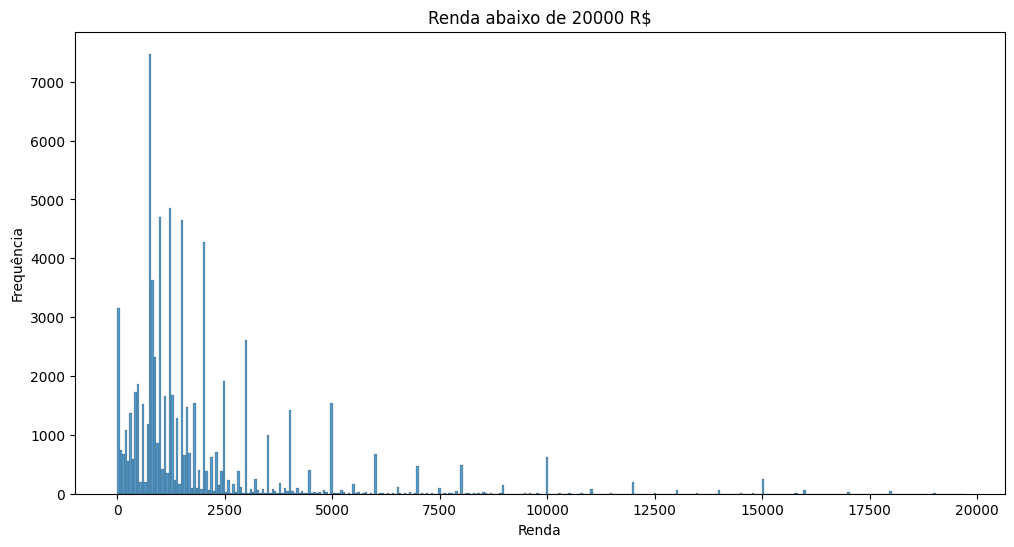

In [18]:
ax = sb.histplot(data = dados.query("Renda < 20000").Renda)
ax.figure.set_size_inches(12, 6)
ax.set_title("Renda abaixo de 20000 R$")
ax.set_ylabel("Frequência")

### Construa uma tabela de frequências e uma com os percentuais do cruzando das variáveis SEXO e COR
#### <font color='blue'>Avalie o resultado da tabela e escreva suas principais conclusões</font>
#### <font color='red'>Utilize os dicionários abaixo para renomear as linha e colunas das tabelas de frequências e dos gráficos em nosso projeto</font>

In [19]:
sexo = {
    0: 'Masculino',
    1: 'Feminino'
}
cor = {
    0: 'Indígena',
    2: 'Branca',
    4: 'Preta',
    6: 'Amarela',
    8: 'Parda',
    9: 'Sem declaração'
}
anos_de_estudo = {
    1: 'Sem instrução e menos de 1 ano',
    2: '1 ano',
    3: '2 anos',
    4: '3 anos',
    5: '4 anos',
    6: '5 anos',
    7: '6 anos',
    8: '7 anos',
    9: '8 anos',
    10: '9 anos',
    11: '10 anos',
    12: '11 anos',
    13: '12 anos',
    14: '13 anos',
    15: '14 anos',
    16: '15 anos ou mais',
    17: 'Não determinados'
}
uf = {
    11: 'Rondônia',
    12: 'Acre',
    13: 'Amazonas',
    14: 'Roraima',
    15: 'Pará',
    16: 'Amapá',
    17: 'Tocantins',
    21: 'Maranhão',
    22: 'Piauí',
    23: 'Ceará',
    24: 'Rio Grande do Norte',
    25: 'Paraíba',
    26: 'Pernambuco',
    27: 'Alagoas',
    28: 'Sergipe',
    29: 'Bahia',
    31: 'Minas Gerais',
    32: 'Espírito Santo',
    33: 'Rio de Janeiro',
    35: 'São Paulo',
    41: 'Paraná',
    42: 'Santa Catarina',
    43: 'Rio Grande do Sul',
    50: 'Mato Grosso do Sul',
    51: 'Mato Grosso',
    52: 'Goiás',
    53: 'Distrito Federal'
}

In [20]:
ct_anos = pd.crosstab(dados.Sexo,
            dados.Cor,
            values = dados["Anos de Estudo"],
            aggfunc = "median")
ct_anos.rename(index = sexo
              , columns = cor)

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,9,12,9,13,9
Feminino,9,12,11,13,11


In [21]:
ct_anos = pd.crosstab(dados.Sexo,
            dados.Cor,
            values = dados["Anos de Estudo"],
            aggfunc = "median",
            normalize = True) * 100
ct_anos.rename(index = sexo
              , columns = cor)

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,8.333333,11.111111,8.333333,12.037037,8.333333
Feminino,8.333333,11.111111,10.185185,12.037037,10.185185


> ### Conclusões

Escreva suas conclusões aqui...

## Realize, para a variável RENDA, uma análise descritiva com as ferramentas que aprendemos em nosso treinamento

### Obtenha a média aritimética

In [22]:
dados.Renda.mean()

2000.3831988547631

### Obtenha a mediana

In [23]:
dados.Renda.median()

1200.0

### Obtenha a moda

In [24]:
dados.Renda.mode()[0]

788

### Obtenha o desvio médio absoluto

In [25]:
(dados.Renda - dados.Renda.mean()).abs().mean()

1526.4951371638058

### Obtenha a variância

In [26]:
dados.Renda.var()

11044906.006217021

### Obtenha o desvio-padrão

In [27]:
dados.Renda.std()

3323.3877303464037

### Obtenha a média, mediana e valor máximo da variável RENDA segundo SEXO e COR
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = {'mean', 'median', 'max'}</i></font>

In [28]:
ctMedia = pd.crosstab(dados.Sexo,
                 dados.Cor,
                 values = dados.Renda,
                 aggfunc = "mean")
ctMedia.rename(index = sexo,
               columns = cor,
               inplace = True)

In [29]:
ctMedian = pd.crosstab(dados.Sexo,
                       dados.Cor,
                       values = dados.Renda,
                       aggfunc = "median")
ctMedian.rename(index = sexo,
                columns = cor,
                inplace = True)
ctMedian

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,797.5,1700.0,1200.0,2800.0,1200.0
Feminino,788.0,1200.0,800.0,1500.0,800.0


In [30]:
ctMax = pd.crosstab(dados.Sexo,
                     dados.Cor,
                     values = dados.Renda,
                     aggfunc = "max")
ctMax.rename(index = sexo,
              columns = cor,
              inplace = True)
ctMax

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,10000,200000,50000,50000,100000
Feminino,120000,100000,23000,20000,30000


> ### Conclusões

Escreva suas conclusões aqui...

### Obtenha as medidas de dispersão da variável RENDA segundo SEXO e COR
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = {'mad', 'var', 'std'}</i></font>

In [31]:
ct_desvio_absoluto = pd.crosstab(dados.Sexo,
                                 dados.Cor,
                                 values = dados.Renda,
                                 aggfunc = "mad")
ct_desvio_absoluto.rename(index = sexo,
          columns = cor)

<ipython-input-31-a83eaae33c40>:1: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  ct_desvio_absoluto = pd.crosstab(dados.Sexo,
<ipython-input-31-a83eaae33c40>:1: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  ct_desvio_absoluto = pd.crosstab(dados.Sexo,
<ipython-input-31-a83eaae33c40>:1: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  ct_desvio_absoluto = pd.crosstab(dados.Sexo,
<ipython-input-31-a83eaae33c40>:1: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  ct_desvio_absoluto = pd.crosstab(dados.Sexo,
<ipython-input-31-a83eaae33c40>:1: F

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,798.910889,2261.012346,975.602482,3709.597211,1125.827704
Feminino,3007.892952,1670.967106,705.453357,2549.146322,811.580946


In [32]:
ct_var = pd.crosstab(dados.Sexo,
                     dados.Cor,
                     values = dados.Renda,
                     aggfunc = "var")
ct_var.rename(index = sexo,
                      columns = cor,
                       inplace = True)
ct_var

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,1.449841e+06,2.257002e+07,3.749294e+06,3.295707e+07,5.345747e+06
Feminino,1.429818e+08,1.056909e+07,1.821960e+06,1.392166e+07,2.547960e+06


In [33]:
ct_std = pd.crosstab(dados.Sexo,
                     dados.Cor,
                     values = dados.Renda,
                     aggfunc = "std")
ct_std.rename(index = sexo,
              columns = cor,
              inplace = True)
ct_std

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,1204.093490,4750.791872,1936.309271,5740.82482,2312.087184
Feminino,11957.498292,3251.013154,1349.799809,3731.17366,1596.233048


> ### Conclusões

Escreva suas conclusões aqui...

### Construa um box plot da variável RENDA segundo SEXO e COR
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos de pessoas analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>
#### <font color='red'>2º - Para incluir uma terceira variável na construção de um boxplot utilize o parâmetro <i>hue</i> e indique a variável que quer incluir na subdivisão.</font>
#### Mais informações: https://seaborn.pydata.org/generated/seaborn.boxplot.html

Text(0.5, 1.0, 'Renda a partir das etnias')

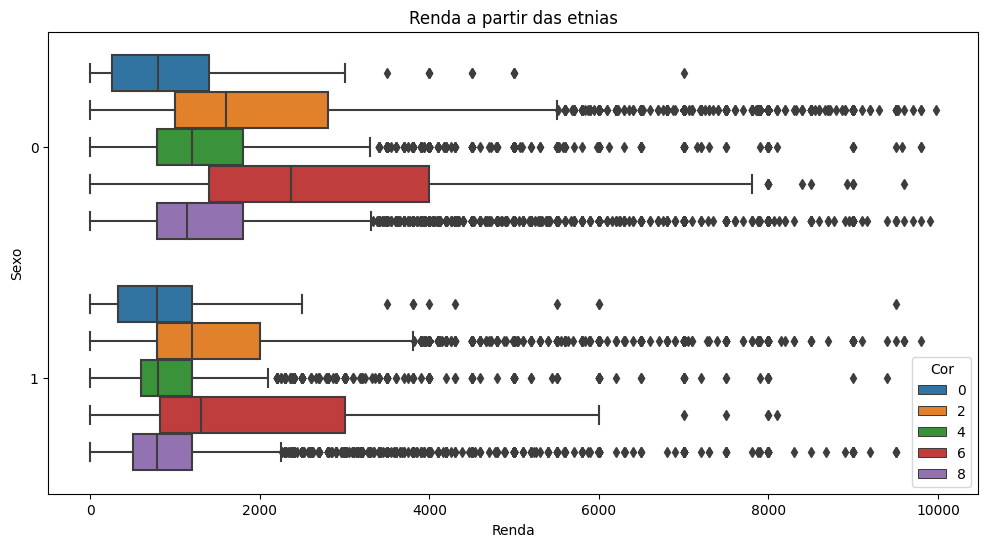

In [34]:
ax = sb.boxplot(data = dados.query("Renda < 10000"),
           x = dados.query("Renda < 10000").Renda,
           y = dados.Sexo,
           hue = dados.Cor,
           orient = 'h')
ax.figure.set_size_inches(12, 6)
ax.set_title("Renda a partir das etnias")

> ### Conclusões

Escreva suas conclusões aqui...

# <font color="red">DESAFIO<font>
### Qual percentual de pessoas de nosso <i>dataset</i> ganham um salário mínimo (R$ 788,00) ou menos?
#### <font color='red'>Utilize a função <i>percentileofscore()</i> do <i>scipy</i> para realizar estas análises.</font>
#### Mais informações: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html


In [35]:
from scipy import stats

stats.percentileofscore(dados.Renda, 788)


24.390942217595

### Qual o valor máximo ganho por 99% das pessoas de nosso <i>dataset</i>?
#### <font color='red'>Utilize o método <i>quantile()</i> do <i>pandas</i> para realizar estas análises.</font>

In [36]:
dados.Renda.quantile(0.99)

15000.0

### Obtenha a média, mediana, valor máximo e desvio-padrão da variável RENDA segundo ANOS DE ESTUDO e SEXO
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = ['mean', 'median', 'max', 'std']</i></font>

In [37]:
est_renda_media = pd.crosstab(dados["Sexo"],
                              dados["Anos de Estudo"],
                              values = dados.Renda,
                              aggfunc = "mean")
est_renda_media.rename(index = sexo, inplace = True)
est_renda_media

Anos de Estudo,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
Sexo,,,,,,,,,,,,,,,,,
Masculino,799.494638,895.629047,931.178986,1109.203862,1302.329283,1338.653218,1448.875419,1465.497940,1639.396667,1508.03885,1731.270847,2117.060504,2470.330776,3195.099154,3706.620269,6134.279790,1295.761905
Feminino,516.201748,492.771987,529.911638,546.853916,704.279111,781.389776,833.732824,830.751004,933.615351,868.02170,925.919225,1286.790889,1682.313725,1911.730047,2226.460457,3899.513231,798.174419


In [38]:
est_renda_mediana = pd.crosstab(dados["Sexo"],
                              dados["Anos de Estudo"],
                              values = dados.Renda,
                              aggfunc = "median")
est_renda_mediana.rename(index = sexo, inplace = True)
est_renda_mediana

Anos de Estudo,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
Sexo,,,,,,,,,,,,,,,,,
Masculino,700,788,788,800,1000,1045,1200,1200,1300,1200,1218,1500,1800,2400,2500,4000,1200
Feminino,390,400,450,500,788,788,788,788,800,788,800,1000,1200,1300,1600,2800,788


In [39]:
est_renda_maxima = pd.crosstab(dados["Sexo"],
                              dados["Anos de Estudo"],
                              values = dados.Renda,
                              aggfunc = "max")
est_renda_maxima.rename(index = sexo, inplace = True)
est_renda_maxima

Anos de Estudo,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
Sexo,,,,,,,,,,,,,,,,,
Masculino,30000,30000,40000,80000,50000,35000,25000,40000,30000,60000,45000,200000,30000,25000,50000,200000,7000
Feminino,10000,2000,4000,3500,10000,8000,6000,9000,18000,20000,6000,100000,120000,20000,20000,100000,3000


In [40]:
est_renda_desvio_padrao = pd.crosstab(dados["Sexo"],
                              dados["Anos de Estudo"],
                              values = dados.Renda,
                              aggfunc = "std")
est_renda_desvio_padrao.rename(index = sexo, inplace = True)
est_renda_desvio_padrao

Anos de Estudo,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
Sexo,,,,,,,,,,,,,,,,,
Masculino,1023.904884,1331.950552,1435.173827,2143.800133,1419.821787,1484.650587,1476.628602,1419.708673,1515.583715,2137.664774,2078.609734,2676.538942,2268.081538,2797.116800,3987.214974,7447.613594,979.648745
Feminino,639.311534,425.291842,498.234168,424.124446,629.553397,635.782641,574.547028,602.038029,896.781213,973.221652,620.611907,1819.040417,4851.833513,2053.789771,2064.083336,4212.770709,459.985964


### Construa um box plot da variável RENDA segundo ANOS DE ESTUDO e SEXO
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos de pessoas analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>
#### <font color='red'>2º - Utilize a variável IDADE para identificar se a desigualdade se verifica para pessoas de mesma idade. Exemplo: <i>data=dados.query('Renda < 10000 and Idade == 40')</i> ou <i>data=dados.query('Renda < 10000 and Idade == 50')</i></font>
#### <font color='red'>3º - Para incluir uma terceira variável na construção de um boxplot utilize o parâmetro <i>hue</i> e indique a variável que quer incluir na subdivisão.</font>
#### Mais informações: https://seaborn.pydata.org/generated/seaborn.boxplot.html

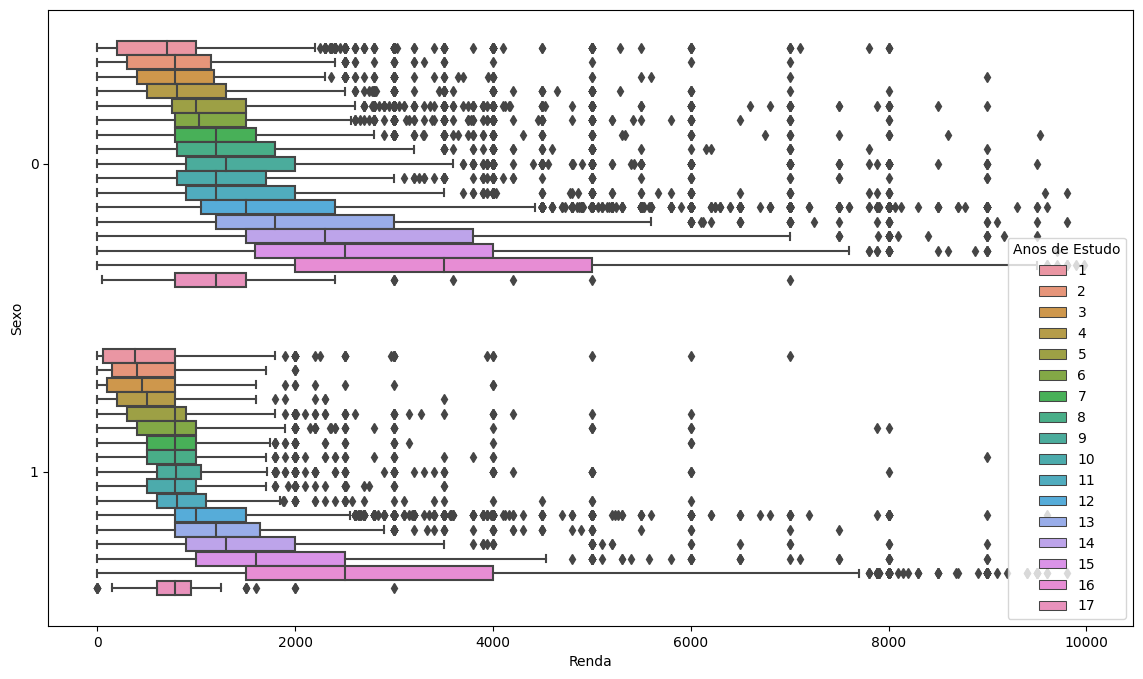

In [44]:
ax = sb.boxplot(data = dados.query("Renda < 10000 and Idade == 40"),
                x = dados.query("Renda < 10000").Renda,
                y = dados.Sexo,
                hue = dados["Anos de Estudo"],
                orient = 'h')
ax.figure.set_size_inches(14, 8)

> ### Conclusões

Escreva suas conclusões aqui...

### Obtenha a média, mediana, valor máximo e desvio-padrão da variável RENDA segundo as UNIDADES DA FEDERAÇÃO
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>Utilize o método <i>groupby()</i> do <i>pandas</i> juntamente com o método <i>agg()</i> para contruir a tabulação. O método <i>agg()</i> pode receber um dicionário especificando qual coluna do DataFrame deve ser utilizada e qual lista de funções estatísticas queremos obter, por exemplo: <i>dados.groupby(['UF']).agg({'Renda': ['mean', 'median', 'max', 'std']})</i></font>

In [50]:
data = dados.groupby(["UF"]).agg({"Renda": ["mean"]})
data.rename(index = uf)

,Renda
,mean
UF,
Rondônia,1789.761223
Acre,1506.091782
Amazonas,1445.130100
Roraima,1783.588889
Pará,1399.076871
Amapá,1861.353516
Tocantins,1771.094946
Maranhão,1019.432009


In [51]:
data = dados.groupby(["UF"]).agg({"Renda": ["median"]})
data.rename(index = uf)

,Renda
,median
UF,
Rondônia,1200.0
Acre,900.0
Amazonas,900.0
Roraima,1000.0
Pará,850.0
Amapá,1200.0
Tocantins,1000.0
Maranhão,700.0


In [52]:
data = dados.groupby(["UF"]).agg({"Renda": ["max"]})
data.rename(index = uf)

,Renda
,max
UF,
Rondônia,50000
Acre,30000
Amazonas,22000
Roraima,20000
Pará,50000
Amapá,15580
Tocantins,60000
Maranhão,30000


In [53]:
data = dados.groupby(["UF"]).agg({"Renda": ["std"]})
data.rename(index = uf)

,Renda
,std
UF,
Rondônia,2406.161161
Acre,2276.233415
Amazonas,1757.935591
Roraima,2079.659238
Pará,2053.779555
Amapá,2020.688632
Tocantins,2934.590741
Maranhão,1887.816905


### Construa um box plot da variável RENDA segundo as UNIDADES DA FEDERAÇÃO
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>

Text(0.5, 1.0, 'Renda a partir dos estados')

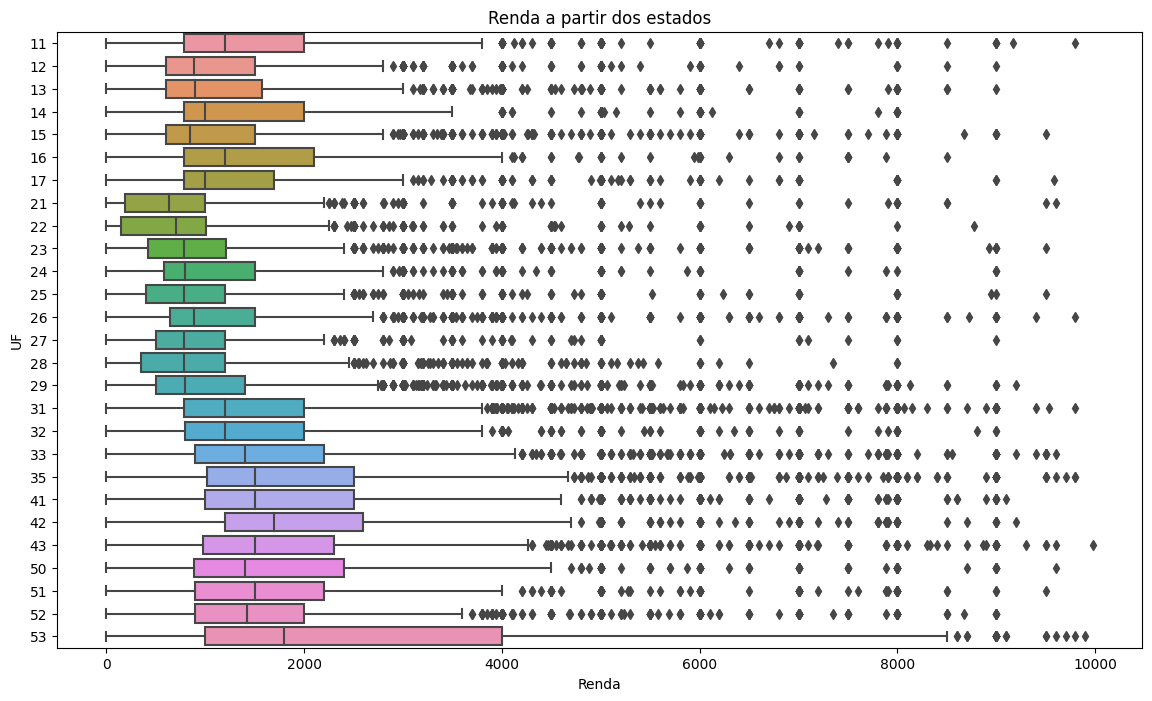

In [69]:
box_uf = sb.boxplot(data = dados.query("Renda < 10000"),
           x = dados.query("Renda < 10000").Renda,
           y = dados.UF,
           orient = 'h')
box_uf.figure.set_size_inches(14, 8)
box_uf.set_title("Renda a partir dos estados")


> ### Conclusões

Escreva suas conclusões aqui...